In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation

import torch
import torch.nn as nn

from utils import Sphere, initialize_rays, rendering, apply_camera_transformation, euler_to_rotation_matrix, create_homogeneous_matrix

In [2]:
H,W = 400,400
ro,rd = initialize_rays(H,W, device="cuda")

In [3]:
def generate_random_spheres(num, device = "cuda"):
    spheres = []
    for _ in range(num):
        r = (torch.rand(1).item() + 0.02)/10
        p = (torch.rand(3) -0.5)/5 + torch.Tensor([0,0,-0.8])
        c = torch.rand(3)

        sphere = Sphere(center=p, radius=r, color=c, device=device)
        spheres.append(sphere)
    return spheres

In [7]:
models = generate_random_spheres(10, device="cuda")

In [12]:
rot = euler_to_rotation_matrix([45,0,0])
tr  = np.array([0,0,0])
c2w = create_homogeneous_matrix(rot)
c2w = torch.Tensor(c2w).to("cuda").squeeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


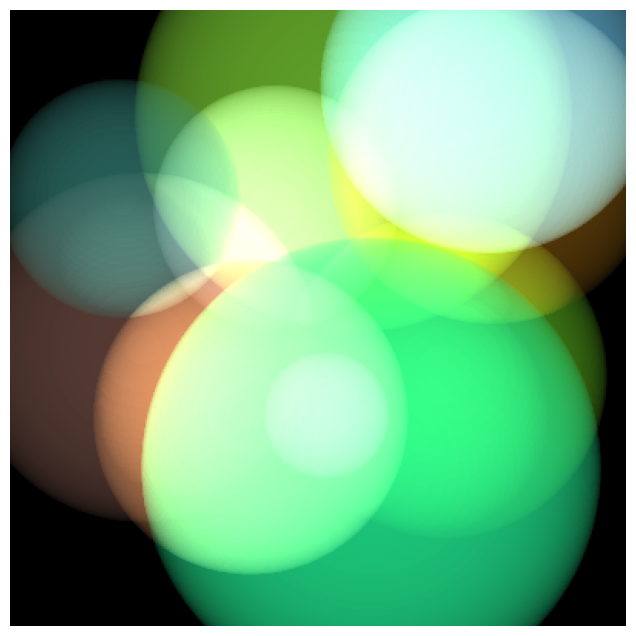

In [16]:
rot = euler_to_rotation_matrix([0,0,0])
tr  = np.array([0,0,0])
c2w = create_homogeneous_matrix(rot)
c2w = torch.Tensor(c2w).to("cuda").squeeze(0)

ro1,rd1 = apply_camera_transformation(ro, rd, c2w)
img = rendering(models, ro1, rd1, nb_bins=800, device="cuda").cpu().reshape(H,W,3).numpy()

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


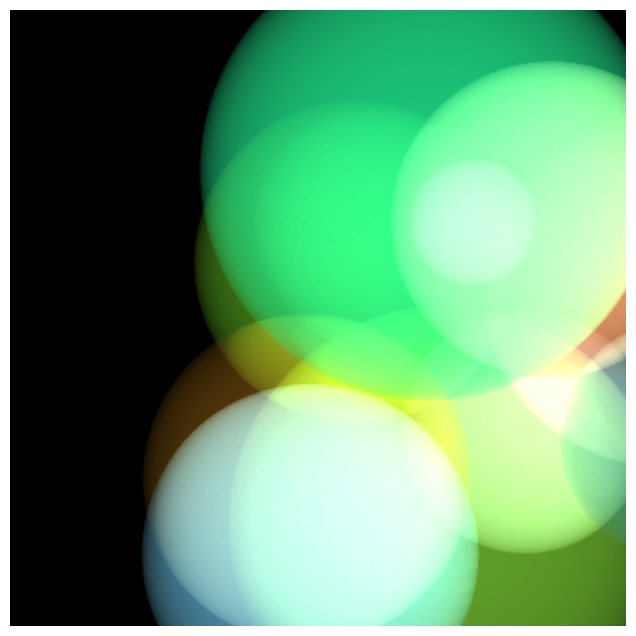

In [20]:
rot = euler_to_rotation_matrix([180,5,0])
tr  = np.array([0,0,0])
c2w = create_homogeneous_matrix(rot)
c2w = torch.Tensor(c2w).to("cuda").squeeze(0)

ro1,rd1 = apply_camera_transformation(ro, rd, c2w)
img = rendering(models, ro1, rd1, nb_bins=800, device="cuda").cpu().reshape(H,W,3).numpy()

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()